In [3]:
import pandas as pd
import hvplot.pandas
import csv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
SalaryData = pd.read_csv("/Users/christophercruz/Documents/project1/Resources/Jobs_2-9.csv")

In [5]:
SalaryData.head()

,Job Title,Job Experience Required,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Year Bucket,Year bin
0,Digital Media Planner,5 - 10 yrs,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855,5,0-5
1,Online Bidding Executive,2 - 5 yrs,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639,2,0-5
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156,0,0-5
3,Technical Support,0 - 5 yrs,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059,0,0-5
4,Software Test Engineer -hyderabad,2 - 5 yrs,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347,2,0-5


In [8]:
SalaryData['sal'] = SalaryData['sal'].astype(int)
SalaryData = SalaryData.loc[(SalaryData['Latitude']<40) & (SalaryData['Latitude']>8)]
SalaryData = SalaryData.loc[(SalaryData['Longitude']>60) & (SalaryData['Longitude']<100)]
SalaryDatagp = SalaryData.groupby('Location')
SalaryDatagp = SalaryDatagp['Location'].count()
SalaryDatagp.sort_values(ascending=False)
SalaryDatagp = pd.DataFrame(SalaryDatagp)
SalaryDatagp = SalaryDatagp.rename(columns={'Location':'Count'})
SalaryDatagp = SalaryDatagp.reset_index()
SalaryDatagp =  SalaryDatagp.loc[SalaryDatagp['Count']>30]
SalaryDatagp
WorkingDataSet = SalaryDatagp.merge(SalaryData, how='inner')
WorkingDataSet.head()

#SalaryData['sal bin'] = pd.cut(SalaryData['sal'], [1000, 2000, 3000,4000,5000,6000], labels=['1000-2000', '6-10', '11-17','17-20','20+'])


,Location,Count,Job Title,Job Experience Required,Functional Area,Industry,Role,Longitude,Latitude,sal,Year Bucket,Year bin
0,Bengaluru,70,Sales- Fresher-for Leading Property Consultant,0 - 0 yrs,"Sales , Retail , Business Development","Real Estate, Property",Sales Executive/Officer,77.590082,12.976794,2585,0,0-5
1,Bengaluru,70,Technical Support/ Product Support,1 - 5 yrs,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(Technical),77.590082,12.976794,2359,1,0-5
2,Bengaluru,70,Back End Java Developer - Restful Services/soap,6 - 8 yrs,"IT Software - DBA , Datawarehousing","IT-Software, Software Services",Software Developer,77.590082,12.976794,4114,6,0-5
3,Bengaluru,70,Product Engineer,4 - 9 yrs,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,77.590082,12.976794,4897,4,0-5
4,Bengaluru,70,Wordpress Web Developer,3 - 6 yrs,"IT Software - Application Programming , Mainte...","Recruitment, Staffing",Software Developer,77.590082,12.976794,4689,3,0-5


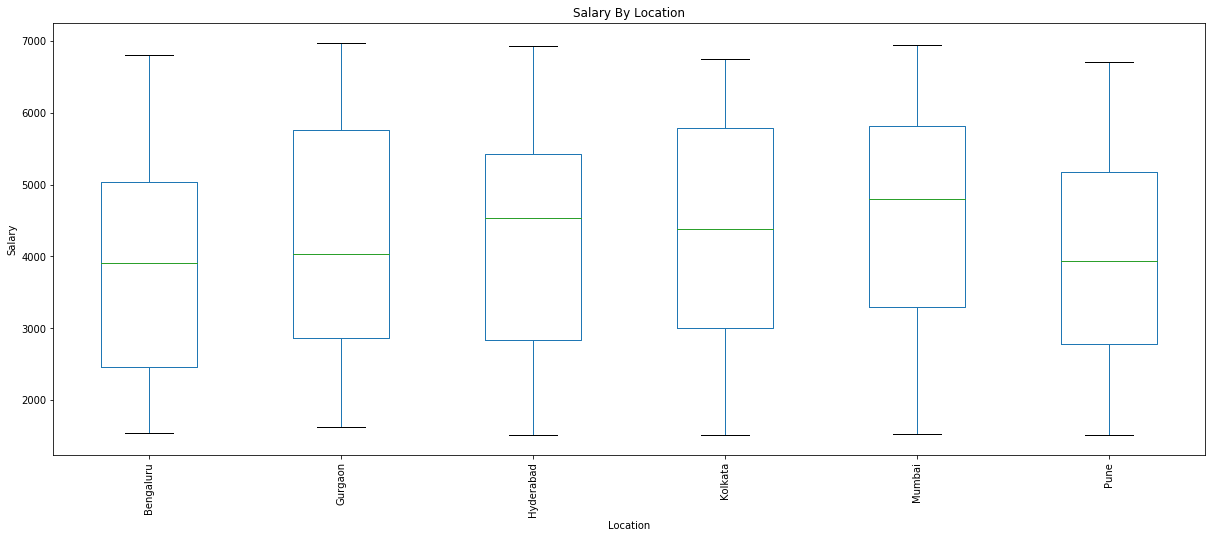

In [17]:
boxplt = WorkingDataSet.boxplot(by='Location',column=['sal'],grid=False,rot=90,figsize=(20,8))
boxplt.set_ylabel('Salary')
plt.title( "Salary By Location")
plt.suptitle('') 
plt.show
plt.savefig('BoxPlot.png')

In [11]:
WorkCityCount = WorkingDataSet[["Location",'Count','Longitude','Latitude']]
WorkCityCount = WorkCityCount.drop_duplicates()
WorkCityCount = WorkCityCount.reset_index()
WorkCityCount
#TopCityLocations = pd.DataFrame


,index,Location,Count,Longitude,Latitude
0,0,Bengaluru,70,77.590082,12.976794
1,70,Gurgaon,38,77.002700,28.428262
2,108,Hyderabad,37,78.474061,17.360589
3,145,Kolkata,32,88.357691,22.541418
4,177,Mumbai,58,72.877393,19.075990
5,235,Pune,45,73.854454,18.521428


In [18]:
map_plot= WorkCityCount.hvplot.points('Longitude', 'Latitude',color='Location', geo=True, scale=7, tiles='OSM',hover_cols=[ 'Count'],size='Count', frame_width=600, frame_height=600) 


map_plot



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Location,Count)

In [13]:
WorkingDatagp = WorkingDataSet.groupby('Location')
WorkingDatagp = WorkingDatagp['sal'].mean()
WorkingDatagp = pd.DataFrame(WorkingDatagp)
WorkingDatagp = WorkingDataSet.merge(WorkingDatagp, how='inner', on='Location')
WorkingDatagp = WorkingDatagp[['Location','Longitude','Latitude','sal_y']]
WorkingDatagp = WorkingDatagp.drop_duplicates()
WorkingDatagp = WorkingDatagp.rename(columns={'sal_y':'Avg. Salary'})
WorkingDatagp

,Location,Longitude,Latitude,Avg. Salary
0,Bengaluru,77.590082,12.976794,3969.842857
70,Gurgaon,77.002700,28.428262,4153.184211
108,Hyderabad,78.474061,17.360589,4243.918919
145,Kolkata,88.357691,22.541418,4352.187500
177,Mumbai,72.877393,19.075990,4476.413793
235,Pune,73.854454,18.521428,4053.955556


In [16]:
map_plot = WorkingDatagp.hvplot.points('Longitude', 'Latitude',color='Location', size='Avg. Salary',scale=0.6, geo=True, tiles='OSM',frame_width=600, frame_height=600) 


map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Location,Avg. Salary)